# TP5.2 -  Exercice (Récap)
On reprend le fichier titanic. La démarche qu'il faut suivre pour la mise en place d'un projet de machine learning est la suivante : 
- Analyse des données du Dataset
  - Analayse de la forme :
      - Vérifier la taille du Dataset X
      - Identifier les variables et les labels et leurs types
      - Visualiser quelques données
      - Analyser les données manquantes
      
 - Pré-traitement des données
    - Elimination des colonnes inutiles
    - Traiter es valeurs manquantes
    - Encoder les colonnes non numériques
    - Selection de variables utiles 
    - Afficher (uniquement les courbes à deux dimensions, par exemple la colonne 4 `X[:, 3]`, en fonction de la colonne 3, `X[:, 2]`)
    - Création des Train set et Test set 
    - Normaliser des données des différentes colonnes 

- Définition du modèle de machine learning adéquat à la tâche (données)
- Evaluation et calcul de performances (ATTENTION Il faut choisir la bonne métrique).


## Questions 
En s'appuyant sur la démarche décrite ci-dessus, comparer les modèles dans les cas suivants :
- donnéees normalisées versus non normalisées
- données manquantes traitées versus non traitées
sur les deux données normalisées et non normalisées et évaluation de leurs performances.
- comparer différents (2 alogos d'apprentissage). <br>

PS :
*** ATTENTION n'oubiez pas de normaliser aussi les données de test. 
La normalisation des données ne peut se faire que sur les données d'apprentissage. 
<span style="color:red"> Il ne faut jamais normaliser avant de spliter les données.
Les données de test ne sont pas connues, un algo. d'apprentissage ne doit jamais utliser une quelconque donnée qui vient des données de test sinon **BIAIS*</span>

<span style="color:green"> La normalisatin doit donc utiliser le même modèle (```transformer```) que celui utilisé dans la phase d'apprentissage ET SURTOUT la même échelle.</span> 

Rappel : pour les données d'entrainement on uilise la méthode ```fit_tranform()```et pour les données de test, ```transform()```


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

### 1 Le dataset
- Lecture du Dataset et Analyse des données

In [4]:
import pandas as pd
data = pd.read_csv("../data/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Coup d'oeil rapide sur le contenu .head()

#### Vérification taille, type des données 


In [5]:
data.shape
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Types variables

In [6]:
data.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

#### Analyse des données manquantes  
- Combien de valeurs manquantes (selon l'objet renvoyé, pandas ou numpy)
- On peut caculer le pourcentage de valeurs manquantes  *data.isnull().sum()/data.shape[0])* 

In [7]:
data.isnull().sum()
#data.isnull().sum()/data.shape[0] # data.null / nb lignes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Visualisation (Survived le label en fonction des variables)

#### Matrice de correlation 

### 2. Pré-traitement des données 

#### Elimination colonnes inutiles
- Utiliser uniquement 'Survived', 'Pclass', 'Sex', 'Age', 'Fare'

In [8]:
# comment supprimer des colonnes 
# data.drop(['nom_colonne1', 'nom_colonne2'], axis=1, inplace=True)
# comment garder des colonnes
# data = data[['nom_colonne1', 'nom_colonne2']]
titanic = data[['Survived','Pclass','Sex','Age','Fare']]
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


#### Traiter les valeurs manquantes
- Deux cas : utiliser un imputer ou supprimer toutes les lignes vides

In [9]:
from sklearn.impute import SimpleImputer
#Supprimer des lignes vides
# titanic.dropna(inplace=True) #titanic.supprier_lignes_vides()
# utilisation d'un imputer qui s'occupe des lignes vides
# imputer = SimpleImputer(strategy='mean')
titanic.dropna(inplace=True)
SimpleImputer(strategy='mean').fit_transform(titanic[['Age']]) # car Age est la seule donnée qui manque des fois

C:\Users\Baran\AppData\Local\Temp\ipykernel_8608\38859907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(inplace=True)


array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [31.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [19.  ],
       [40.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [ 3.  ],
       [19.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [45.  ],
       [ 4.  ],
       [29.  ],
       [19.  ],
       [17.  ],
       [26.  ],
       [32.  ],
       [16.  ],
       [21.  ],
       [26.  ],
       [32.  ],
       [25.  ],
       [ 0.83],
       [30.  ],
       [22.  ],
       [

#### Encodage des données non numériques ?

In [10]:
from sklearn.preprocessing import LabelEncoder
# quel encoder pour les données non numériques pour titanic ?
encoder = LabelEncoder()
# encodage des données non numériques sur titanic
titanic['Sex'] = encoder.fit_transform(titanic['Sex']) # transforme les données non numériques en numériques par exemple homme = 0 femme = 1
titanic.head()

C:\Users\Baran\AppData\Local\Temp\ipykernel_8608\519918513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Sex'] = encoder.fit_transform(titanic['Sex']) # transforme les données non numériques en numériques par exemple homme = 0 femme = 1


,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


#### Normalisation 
Attention la normalisation à la normalisation des données de test.

In [11]:
from sklearn.preprocessing import MinMaxScaler # méthode la plus utilisée car elle permet de conserver les outliers
from sklearn.preprocessing import StandardScaler # méthode qui permet de conserver la forme de la distribution
from sklearn.preprocessing import RobustScaler # la plus robuste car cette méthode est moins sensible aux outliers
# outlier = données qui sont très éloignées des autres données par exemple 10, 20, 30, 40, 50, 60, 70, 80, 90, 100000(ici 100000 est un outlier)
scaler = MinMaxScaler()
# normalisation des données de titanic (que les données numériques)
titanic[['Age', 'Fare']] = scaler.fit_transform(titanic[['Age', 'Fare']])

C:\Users\Baran\AppData\Local\Temp\ipykernel_8608\2861008571.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic[['Age', 'Fare']] = scaler.fit_transform(titanic[['Age', 'Fare']])


### Pré-processing des données

In [12]:
#préprocessing des données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

encoder = LabelEncoder()
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Visualisation de de queques données (normalisées et non non normalisées) ?

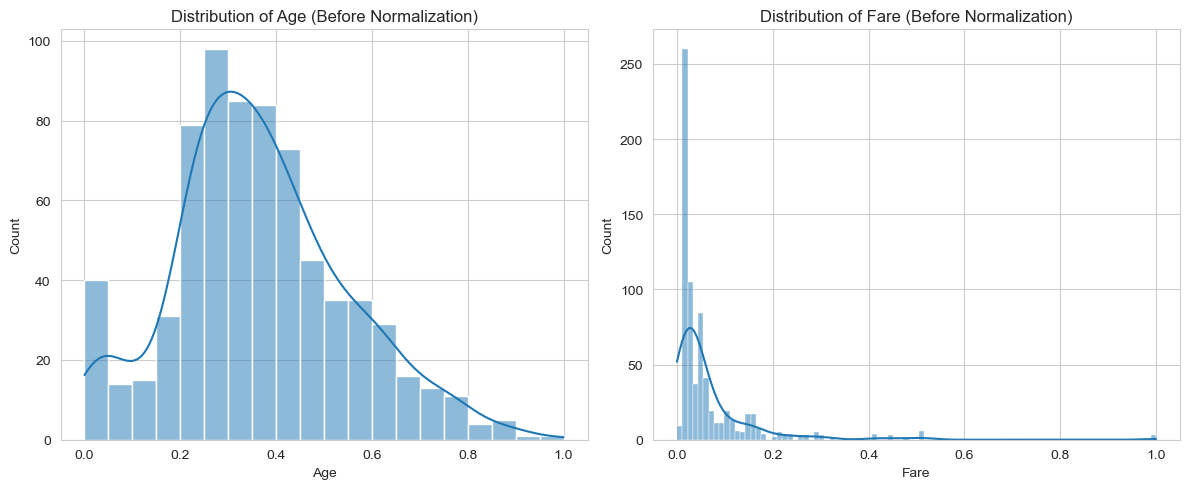

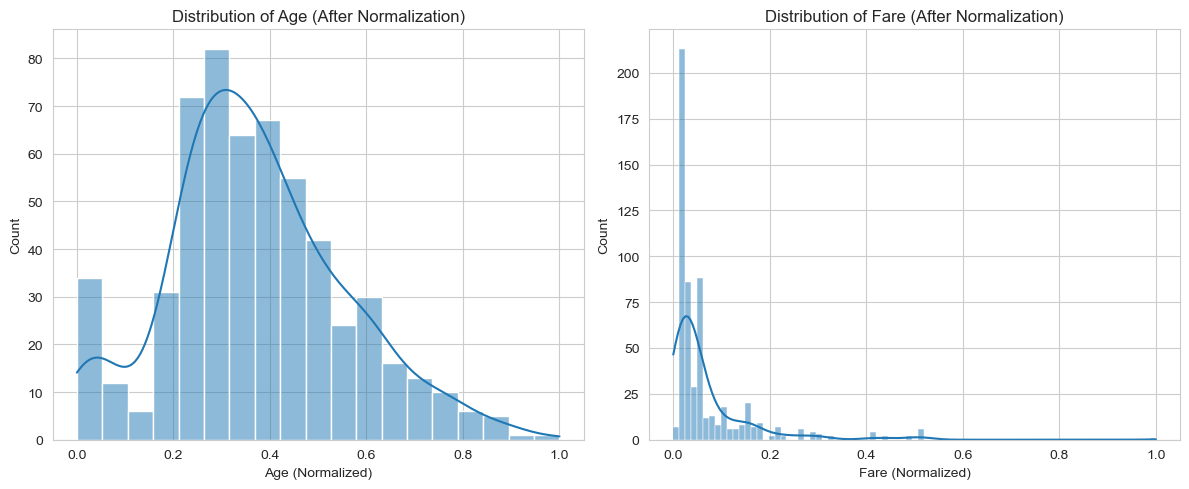

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'Age' column before normalization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(titanic['Age'], kde=True)
plt.title('Distribution of Age (Before Normalization)')
plt.xlabel('Age')

# Visualize the distribution of the 'Fare' column before normalization
plt.subplot(1, 2, 2)
sns.histplot(titanic['Fare'], kde=True)
plt.title('Distribution of Fare (Before Normalization)')
plt.xlabel('Fare')

plt.tight_layout()
plt.show()

# Assuming you have already defined and applied the scaler to X_train and X_test
# Visualize the distribution of the 'Age' column after normalization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_train['Age'], kde=True)
plt.title('Distribution of Age (After Normalization)')
plt.xlabel('Age (Normalized)')

# Visualize the distribution of the 'Fare' column after normalization
plt.subplot(1, 2, 2)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Distribution of Fare (After Normalization)')
plt.xlabel('Fare (Normalized)')

plt.tight_layout()
plt.show()

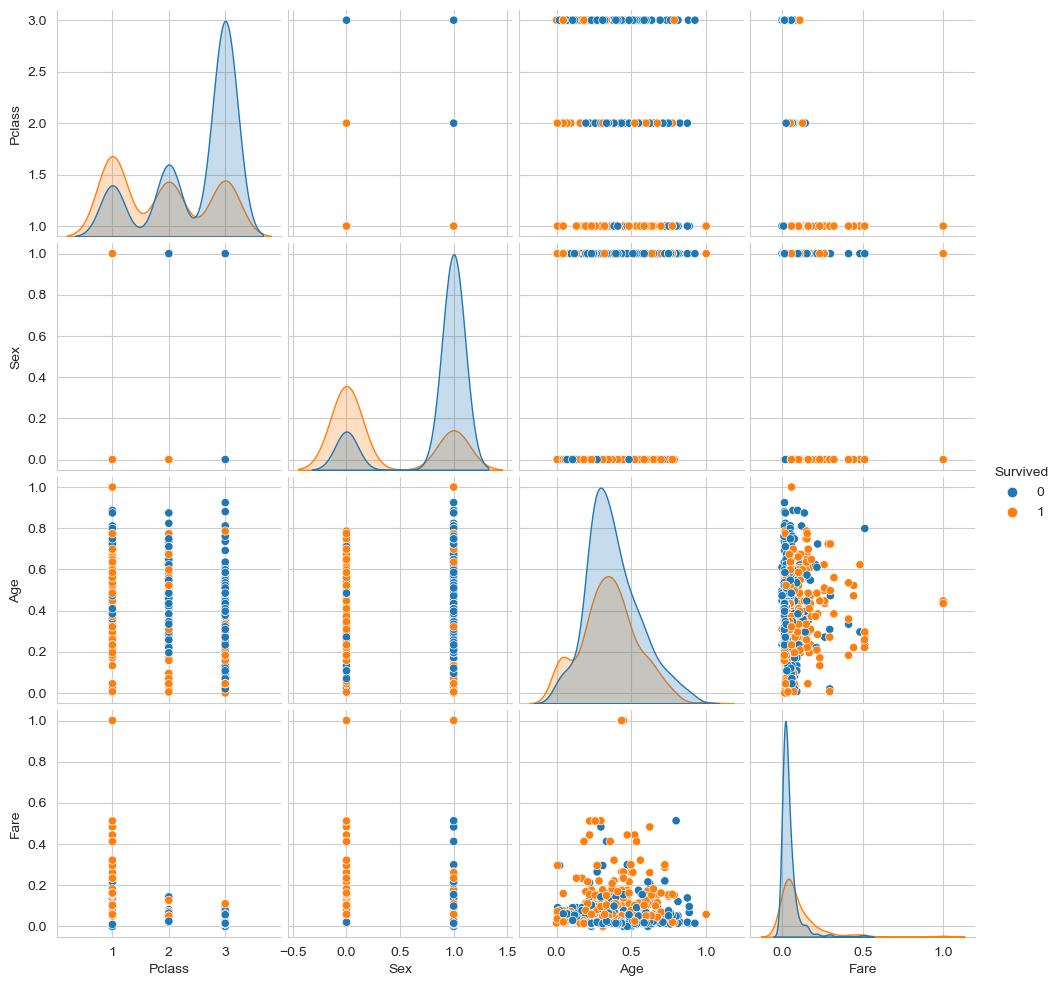

In [14]:
# Pairplot 
sns.pairplot(titanic, hue='Survived')
plt.show()

## Modélisation

In [15]:
# modelisation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [16]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

### Entrainement

In [18]:
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

### Evaluation du modèle

In [19]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(X_train_scaled, y_train)

LogisticRegression()


# Evaluation du modèle


In [20]:
# Evaluation du modèlemodel = LogisticRegression()
y_pred = logic.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1: {}'.format(f1))

Accuracy: 0.6083916083916084
Precision: 0.0
Recall: 0.0
F1: 0.0


C:\Users\Baran\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Baran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
